In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

GRID_SIZE = 100

grid = np.zeros((GRID_SIZE, GRID_SIZE))

num_obstacles = (30/100)*(GRID_SIZE*GRID_SIZE)
obstacle_coords = set()
while len(obstacle_coords) < num_obstacles:
    x, y = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
    obstacle_coords.add((x, y))
    grid[x, y] = 1

In [21]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
num_episodes = 500000

In [22]:
q_table = np.zeros((GRID_SIZE, GRID_SIZE, 4))
actions = [(0, -1), (0, 1), (-1, 0), (1, 0)]

START_LOCATION = (10, 10)
STOP_LOCATION = (GRID_SIZE - 10, GRID_SIZE - 10)

In [23]:
def q_learning():
    for episode in tqdm(range(num_episodes)):
        x, y = START_LOCATION
        while grid[x, y] == 1:
            x, y = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        for t in range(100):
            if random.random() < epsilon:
                action = random.randint(0, 3)
            else:
                action = np.argmax(q_table[x, y])
            dx, dy = actions[action]
            new_x, new_y = x + dx, y + dy

            if (new_x < 0 or new_x >= GRID_SIZE or 
                new_y < 0 or new_y >= GRID_SIZE or 
                grid[new_x, new_y] == 1):
                reward = -1
                new_x, new_y = x, y
            else:
                reward = -0.1
                if (new_x, new_y) == STOP_LOCATION:
                    reward = 10
                    
            q_table[x, y, action] += alpha * (reward + gamma * np.max(q_table[new_x, new_y]) - q_table[x, y, action])
            x, y = new_x, new_y
            
            if (x, y) == STOP_LOCATION:
                break

In [24]:
# Run Q-learning
q_learning()

100%|█████████████████████████████████████████████████████████████████████████| 500000/500000 [15:57<00:00, 521.97it/s]


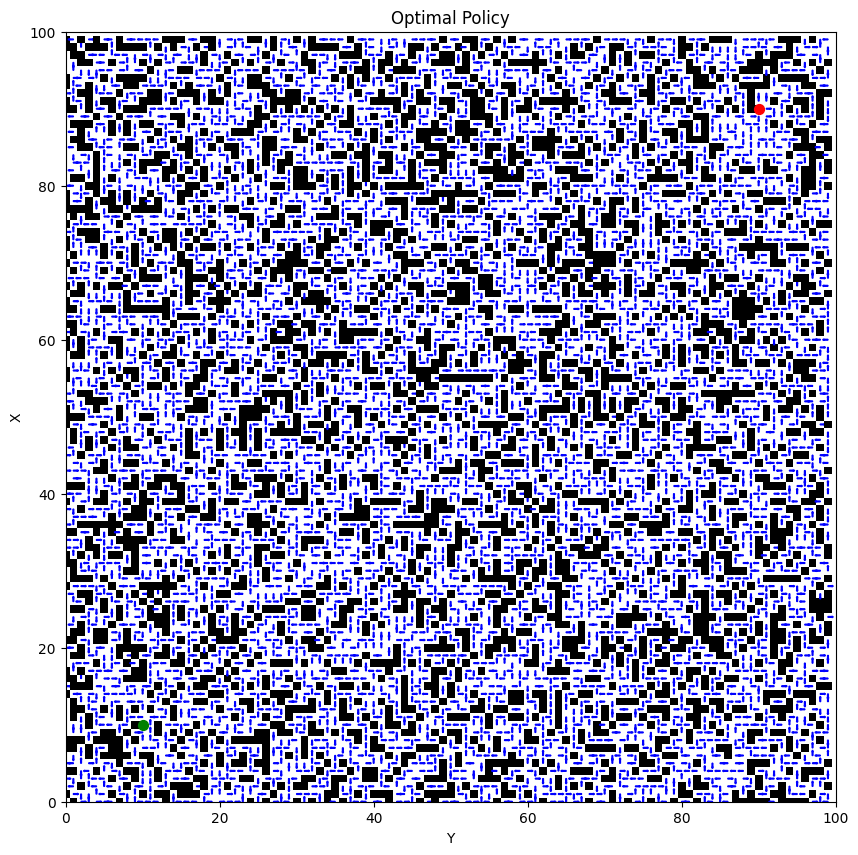

In [25]:
# Visualize the optimal policy
policy = np.argmax(q_table, axis=2)
plt.figure(figsize=(10, 10))
for x in range(GRID_SIZE):
    for y in range(GRID_SIZE):
        if grid[x, y] == 1:
            plt.gca().add_patch(plt.Rectangle((y-0.5, x-0.5), 1, 1, linewidth=0, facecolor='black')) 
        else:
            action = policy[x, y]
            dx, dy = actions[action]
            plt.arrow(y, x, dy*0.5, dx*0.5, head_width=0.2, head_length=0.2, fc='b', ec='b', width=0.1)
plt.scatter(START_LOCATION[1], START_LOCATION[0], color='green', s=50)  # start location
plt.scatter(STOP_LOCATION[1], STOP_LOCATION[0], color='red', s=50)  # stop location
plt.xlim(0, GRID_SIZE)
plt.ylim(0, GRID_SIZE)
plt.xlabel('Y')
plt.ylabel('X')
plt.title('Optimal Policy')
plt.gca().set_aspect('equal', adjustable='box') 
plt.show()

In [29]:
q_table

array([[[-9.99999993, -9.99999993, -9.99999993, -9.99999993],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [-1.89999883, -1.        , -1.89999171, -1.        ],
        ...,
        [-1.89929638, -1.        , -1.89774088, -1.89742898],
        [-1.        , -1.        , -1.9       , -1.        ],
        [-1.        , -1.89999782, -1.89997604, -1.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ],
        [-1.8999949 , -1.        , -1.89999954, -1.        ],
        [-1.        , -1.        , -1.        , -1.9       ],
        ...,
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [-1.89999998, -1.        , -1.        , -1.        ],
        [-1.        , -1.89998946, -1.        , -1.89998484]],

       [[-1.89999671, -1.        , -1.89999914, -1.        ],
        [-1.        , -1.89999997, -1.        , -1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        ...,
        [-1.        , -1.  

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:39<00:00, 25.43it/s]


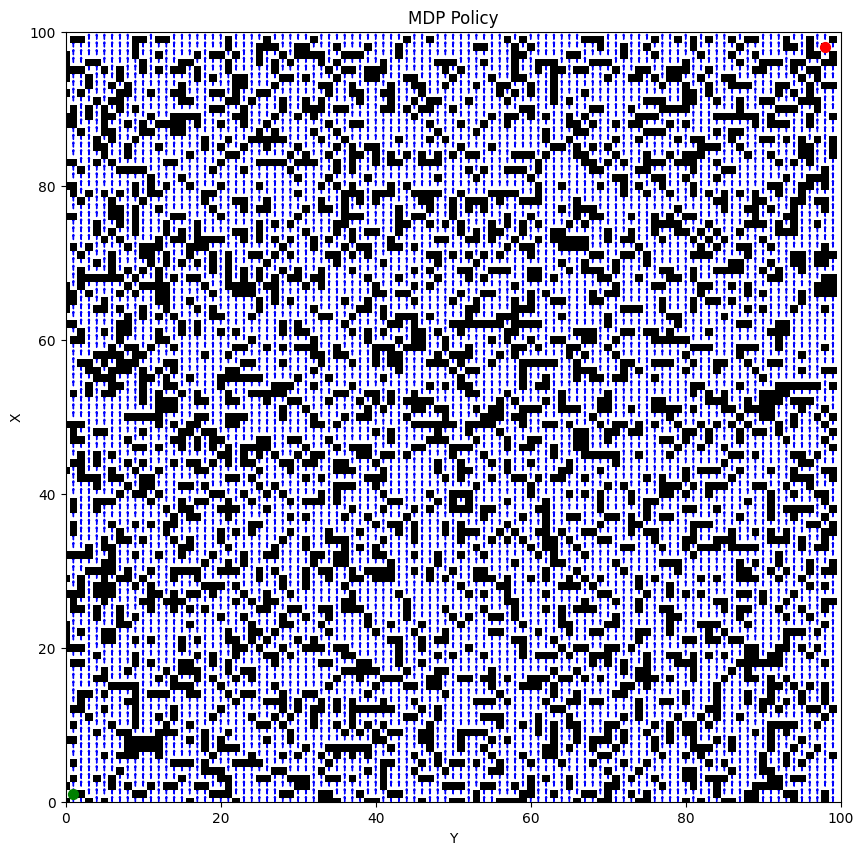

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the grid size
GRID_SIZE = 100

# Create the grid with obstacles
grid = np.zeros((GRID_SIZE, GRID_SIZE))

# Add obstacles (randomly placed)
num_obstacles = (30/100)*(GRID_SIZE*GRID_SIZE)
obstacle_coords = set()
while len(obstacle_coords) < num_obstacles:
    x, y = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
    obstacle_coords.add((x, y))
    grid[x, y] = 1  # 1 represents an obstacle

# Define the MDP parameters
states = [(x, y) for x in range(GRID_SIZE) for y in range(GRID_SIZE) if grid[x, y] == 0]
actions = ['up', 'down', 'left', 'right']
transition_prob = 0.9  # probability of transitioning to the next state
reward = -1  # reward for each step
gamma = 0.9  # discount factor

# Custom start and stop locations
START_LOCATION = (1, 1)
STOP_LOCATION = (GRID_SIZE - 2, GRID_SIZE - 2)

# Define the MDP transition model
def transition(state, action):
    x, y = state
    if action == 'up':
        new_state = (x-1, y)
    elif action == 'down':
        new_state = (x+1, y)
    elif action == 'left':
        new_state = (x, y-1)
    elif action == 'right':
        new_state = (x, y+1)
    
    if (0 <= new_state[0] < GRID_SIZE and 
        0 <= new_state[1] < GRID_SIZE and 
        grid[new_state[0], new_state[1]] == 0):
        return new_state
    else:
        return state

# Define the MDP reward function
def reward_func(state):
    if state == STOP_LOCATION:
        return 10  # reward for reaching the goal
    else:
        return reward

# Value iteration algorithm
def value_iteration():
    values = {state: 0 for state in states}
    policy = {}
    
    for _ in tqdm(range(1000)):  # max iterations
        for state in states:
            max_value = float('-inf')
            best_action = None
            
            for action in actions:
                new_state = transition(state, action)
                value = reward_func(state) + gamma * values[new_state]
                if value > max_value:
                    max_value = value
                    best_action = action
            
            values[state] = max_value
            policy[state] = best_action
    
    return values, policy

# Run value iteration
values, policy = value_iteration()

# Visualize the MDP
plt.figure(figsize=(10, 10))
for x in range(GRID_SIZE):
    for y in range(GRID_SIZE):
        if grid[x, y] == 1:
            plt.gca().add_patch(plt.Rectangle((y-0.5, x-0.5), 1, 1, linewidth=0, facecolor='black')) 
        elif (x, y) in policy:
            action = policy[(x, y)]
            if action == 'up':
                plt.arrow(y, x, 0, 0.5, head_width=0.2, head_length=0.2, fc='b', ec='b')
            elif action == 'down':
                plt.arrow(y, x, 0, -0.5, head_width=0.2, head_length=0.2, fc='b', ec='b')
            elif action == 'left':
                plt.arrow(y, x, -0.5, 0, head_width=0.2, head_length=0.2, fc='b', ec='b')
            elif action == 'right':
                plt.arrow(y, x, 0.5, 0, head_width=0.2, head_length=0.2, fc='b', ec='b')
plt.scatter(START_LOCATION[1], START_LOCATION[0], color='green', s=50)  # start location
plt.scatter(STOP_LOCATION[1], STOP_LOCATION[0], color='red', s=50)  # stop location
plt.xlim(0, GRID_SIZE)
plt.ylim(0, GRID_SIZE)
plt.xlabel('Y')
plt.ylabel('X')
plt.title('MDP Policy')
plt.show()